In [5]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from keras import Sequential

# if not os.path.isdir('models'):
#     os.mkdir('C:\\Users\\shiva\\Documents\\pr_22\\Image-Classification-using-CNN-main\\model')

In [6]:
def get_four_classes(x,y):
    indices_0, _ = np.where(y==0.)
    indices_1, _ = np.where(y==1.)
    indices_2, _ = np.where(y==2.)
    
    
    indices = np.concatenate([indices_0,indices_1,indices_2], axis=0)
    
    x=x[indices]
    y=y[indices]
    
    count=x.shape[0]
    indices = np.random.choice(range(count),count,replace=False)
    x=x[indices]
    y=y[indices]
    
    y=tf.keras.utils.to_categorical(y)
    return x,y

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train,y_train = get_four_classes(x_train,y_train)
x_test,y_test = get_four_classes(x_test,y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape) 

170498071/170498071 [==============================] - 24s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


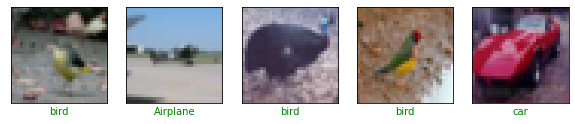

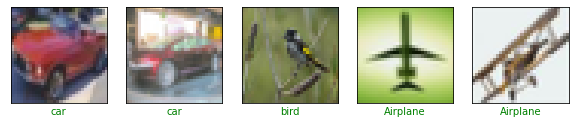

In [7]:
class_names = ['Airplane','car', 'bird']

def show_random_examples(x,y,p):
    indices = np.random.choice(range(x.shape[0]),10,replace=False)
    
    x=x[indices]
    y=y[indices]
    p=p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(5):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        
        col= 'green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
        
        
plt.show()

show_random_examples(x_train,y_train,y_train)
show_random_examples(x_test,y_test,y_test)

        
        

In [8]:
from tensorflow.keras.layers import MaxPooling2D,  BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input,Dense
from keras.layers import Conv2D

def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    model = add_conv_block(model,32)
    model = add_conv_block(model,64)
    model = add_conv_block(model,128)
    
    
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam', metrics=['accuracy']
        
    )
    return model
    
model = create_model()
        
    
        
        

In [9]:
h = model.fit(
    x_train/255.,y_train,
    validation_data = (x_test/255.,y_test),
    epochs = 10,batch_size=128,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_accuracy',
            patience= 3
    
        ),
        tf.keras.callbacks.ModelCheckpoint(
        'model/model_{val_accuracy:.3f}.h5',
            save_best_only = True,
            save_weights_only = False,
            monitor='val_accuracy'
        
        )
        
        
    ]



)

Epoch 1/10


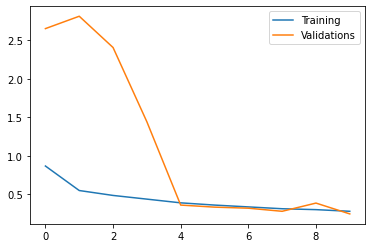

In [7]:
plt.plot(h.history['loss'], label = 'Loss')
plt.plot(h.history['val_loss'], label = 'Val_Loss')
plt.legend()


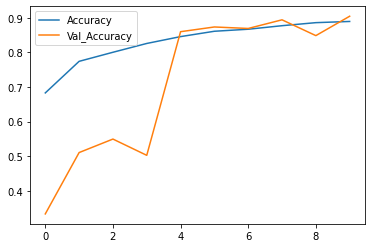

In [8]:
plt.plot(h.history['accuracy'], label = 'Accuracy')
plt.plot(h.history['val_accuracy'], label = 'Val_Accuracy')
plt.legend()

In [10]:
model = tf.keras.models.load_model('model/model_0.905.h5')

In [11]:
preds = model.predict(x_test/255.)

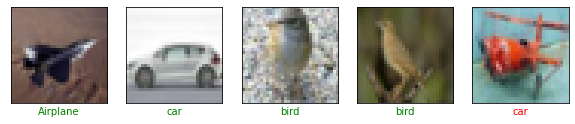

In [20]:
show_random_examples(x_test,y_test,preds)